# ESU 2018 Computer Vision & Art History Notebook

Thanks for registering to the 2018 Computer Vision & Art History workshop at ESU 2018. This notebook will take you through some of the steps necessary to checking that Jupyter is installed correctly on your device, so we can hit the ground running in Leipzig. 

Jupyter works the same on Windows, Mac or Linux (or even on a tablet with a proper keyboard). Don't worry if you don't understand many things about Jupyter or Python - the important thing is to come with everything properly installed. 

Jupyter divides a Python script into 'cells', each of which contains a short series of instructions and comments. To run each cell (and go to the next one), press Shift+Enter. 


Once you have Jupyter installed correctly, we're going to to try and import, then use, specific Python libraries we'll find useful for the workshop. These are: 
- OpenCV (computer vision) 
- Scikit-Image (computer vision and image processing)
- Scikit-Learn (machine learning)
- Tensorflow (machine learning)

To install each of these, you should write the following commands into Anaconda Prompt (Windows & Mac) or into Terminal (Linux & Mac). At each stage, you will most likely be asked to confirm the installation by typing "y" into the terminal screen and pressing enter.

(This creates a new virtual python environment called esu2018) (All):

`conda create -n esu2018 pip python=3.3`

(Now we activate our virtual python environment:)
(Mac/Linux):`source activate esu2018` 
(Windows):`activate esu2018`

(Now we install specific packages) (All):

`conda install -c conda-forge tensorflow`

`conda install -c menpo opencv`

`conda install scikit-image`  

`conda install matplotlib`

`conda install scikit-learn`  

`conda install ipykernel`

(That last one was to connect our new virtual python environment to the jupyter notebook - we now install esu2018 into the notebook) (All):

`python -m ipykernel install --user --name esu2018 --display-name "ESU2018 (Py3)"`

Please note that many of these commands will take some time (particularly the first). 

When you've done that, you should see the kernel 'ESU2018' selectable in the Jupyter notebook, under the top menu bar: Kernel > Change kernel


In [1]:
# Lines which start with the pound sign (#) are text comments, and are ignored by Python. 
# In the following line, we try to import some libraries which should come as standard in Python. 
# Worry about your installation if any of these give an error... 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
print('Imported Numpy and Pyplot successfully')

Imported Numpy and Pyplot successfully


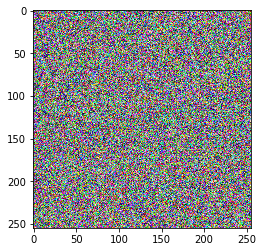

In [2]:
# To check we've imported the above libraries properly, we're going to try and display an image 
# made up of random numbers. This should look like bad TV electrical noise. 
RandIm = np.random.random((255,255,3))
plt.imshow(RandIm)

In [3]:
# Now we're going to try importing OpenCV, the traditional standard Computer Vision library, and using its face detector
import cv2
from skimage import io
print('Imported OpenCV correctly')

Imported OpenCV correctly


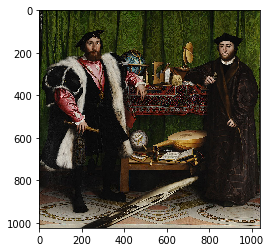

In [4]:
Ambassadors = io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Hans_Holbein_the_Younger_-_The_Ambassadors_-_Google_Art_Project.jpg/1039px-Hans_Holbein_the_Younger_-_The_Ambassadors_-_Google_Art_Project.jpg')
plt.imshow(Ambassadors)

In [5]:
# Now we load the pretrained face detector into memory, and convert the image into greyscale:

faceCascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(Ambassadors, cv2.COLOR_BGR2GRAY)

In [6]:
# And detect the faces from the greyscale image, saving the coordinates into the list 'facecoods'

faceCoords = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)

In [7]:
# We use the coordinates to crop sections of our original (colour) image:

faceim = []
for f in faceCoords:
    faceim.append(Ambassadors[ f[1]:f[1]+f[3],f[0]:f[0]+f[2],:])

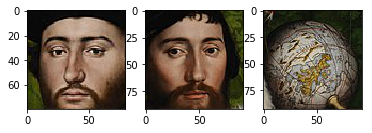

In [8]:
# Finally, we display our cropped faces in the notebook:

nFaces = len(faceim)
for i in range(nFaces):
    plt.subplot(1,nFaces,1+i)
    plt.imshow(faceim[i])
    

So there we have it - our two ambassadors, and an apparently face-like globe. This higlights an important point of computer vision - it's not always right!

See you in Leipzig. 